## Problem Statement

#### When it comes to income distribution and earnings across races and social backgrounds, most people will agree that there is a huge disparity and imbalance. In the tech industry, globalisation of work has removed market and location barriers to income and as such, background and racial identity should matter very little to earnings in our current society. 

#### In this notebook, I'm going to examine the relationship between race and family background of developers and their current level of income in the tech industry. In order to get useful insight into this relationship, I set out to answer the following questions: 

1.  How does the annual income of developers vary between ethnic groups?

2. Do student developers of different backgrounds also have widely different salary expectations from their peers?

3. Is a developer likely to earn more if either of the parents graduated from college?




## The Data

I am making use of the   <a href =https://insights.stackoverflow.com/survey> 2017 Stack Overflow developer survey results</a> because of the varying background of its participants from around the world and its focus wide range of standardised questions. 

In [16]:
#Now let's take a look at the survey results and the questions that generated them. 

#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
import Diversity_RepresentationInTech as d
%matplotlib inline

df = pd.read_csv('survey_results_public.csv') #loading survey results
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#The data has 154 columns of different data types that could be useful in our analysis.
#But first, let's  get a bit more understanding of our data.
print(df.shape); #number of rows and columns
df.describe()

(51392, 154)


,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


We have 51392 respondents answering the 154 questions. From the description above, it looks like we have 7 numeric columns  which include the Salary and Expected Salary. 
All the numeric columns above have **missing values and we will deal with the ones that concern us later.** 

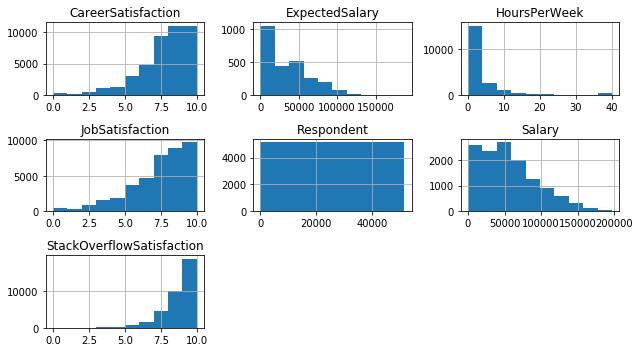

In [14]:
df.hist(figsize = (9,5))
plt.tight_layout()

Salary, ExpectedSalary and HoursPerWeek columns have non-symmetric right-skewed distribution (majority of participants are on the lower range of respective variables) while the other numerical columns are left-skewed (majority on the upper range of respective variables)

In [39]:
#Next, let's  load and have a quick look at the schema that contains 
#the questions posed to respondents

df2 = pd.read_csv('survey_results_schema.csv')
df2.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [41]:
#We can check for specific question that participants answered for confirmation in the 
#survey schema as follows
df2[df2['Column'] =='Race']['Question']

147    Which of the following do you identify as?
Name: Question, dtype: object

Now that we have an understanding of our data, we can proceed to our first question and prepare the data for each analysis requirement. 

## 1. How does the annual income of developers vary between ethnic groups?

To answer this question, let's see the answers provided by participants to the question of Race. 

In [43]:
#Count the unique values of race entered by respondents
race_count_val = df['Race'].value_counts(); 
race_count_val 

White or of European descent                                                                                           23415
South Asian                                                                                                             2657
Hispanic or Latino/Latina                                                                                               1289
East Asian                                                                                                              1285
Middle Eastern                                                                                                           899
                                                                                                                       ...  
East Asian; Native American, Pacific Islander, or Indigenous Australian; I don’t know                                      1
Black or of African descent; Hispanic or Latino/Latina; South Asian; I don’t know                                          1


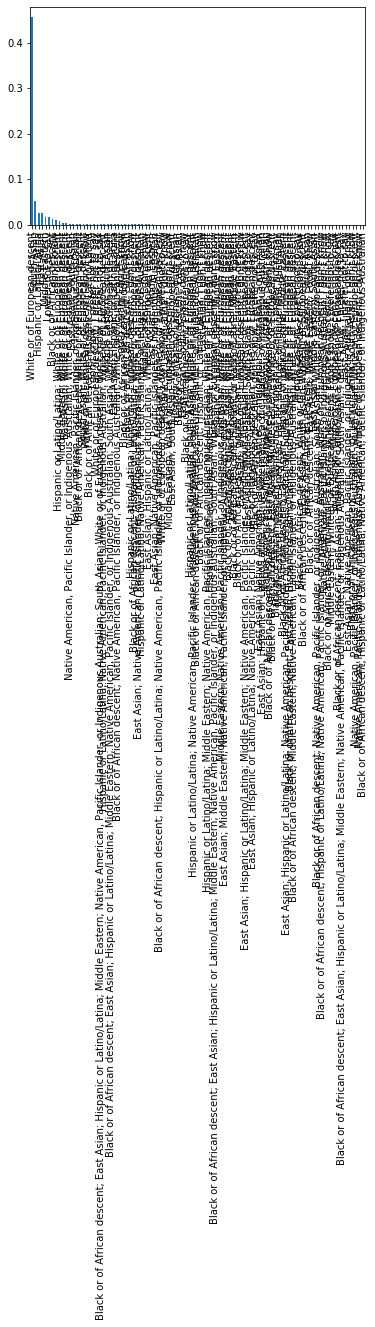

In [44]:
#A quick plot of the race_count_val will quickly tell us that there's need to clean the results
(race_count_val/df.shape[0]).plot(kind = 'bar')

The plot above gives no useful information. Hence, there is a need to clean up this data so we can have a better perspective of the race distribution of the survey participants on stackoverflow.  

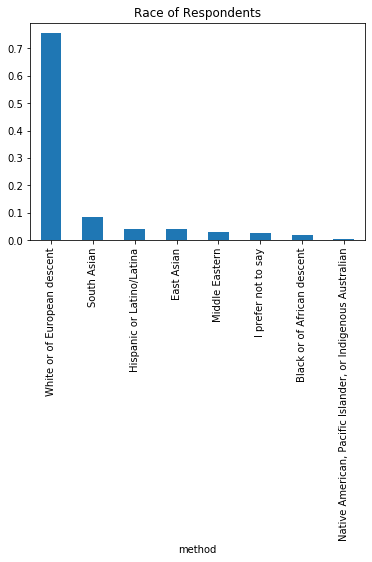

<Figure size 432x288 with 0 Axes>

In [77]:
possible_race = ['White or of European descent', 'South Asian', 'Hispanic or Latino/Latina', 
                 'East Asian', 'Middle Eastern','Native American, Pacific Islander, or Indigenous Australian',
                 'I prefer not to say','Black or of African descent','I don\'t know']

def clean_and_plot(df, title='Race of Respondents', plot=True):
    '''
    INPUT 
        df - a dataframe holding the Race column
        title - string the title of your plot
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the Race column.
    '''
    race_group = df['Race'].value_counts().reset_index()
    race_group.rename(columns={'index': 'method', 'Race': 'count'}, inplace=True)
    race_group_df = d.total_count(race_group, 'method', 'count', possible_race)

    race_group_df.set_index('method', inplace=True)
    if plot:
        (race_group_df/race_group_df.sum()).plot(kind='bar', legend=None,);
        plt.title(title);
        plt.show()
        plt.tight_layout()
    props_race_group = race_group_df/race_group_df.sum()
    return props_race_group
    
props_df = clean_and_plot(df)

As seen, more than 70% of respondents to the Stackoverflow survey are of `White or of European descent`, about 13% of `Asian descent`, 2% of `Black or of African descent` and the lowest being from `Native American, Pacific Islander, or Indigenous Australian` at just 1% of the total. 

It is important we establish that the survey results is very likely not a true representation of the ethnic distribution in the tech industry as <a href= https://insights.stackoverflow.com/survey/2017#remote-work>80% of the survey respondents  are visitors to a stack exchange site. Also,only frequent visitors to stack overflow during the survey period were more likely to take the poll. </a> 

Thus, this analysis is simply taking a dive and presenting the results.

#### Race vs Salary
The participants provided data on their current or expected annual salary which Stack Overflow has helped to convert to US Dollars. If we're curious enough, how exactly does this annual income vary amongst the ethnic group represented? Is there a pattern we can immediately observe?

In [26]:
#What question requested participants' salaries?
list(df2[df2['Column'] == 'Salary']['Question']) 

['What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?']

In [8]:
#The function below is also included in the python script
def clean_race(race_item):
    possible_race = ['White or of European descent', 'South Asian', 'Hispanic or Latino/Latina', 
                 'East Asian', 'Middle Eastern','Native American, Pacific Islander, or Indigenous Australian',
                 'I prefer not to say','Black or of African descent','I don\'t know']
    '''
    INPUT
    race_item - line item of the dataframe column
    
    OUTPUT
    val - cleaned and streamlined data
    
    '''
    race_item = str(race_item)
    for val in possible_race:
        if val in race_item:
            return val 
        else:
            pass
df['Race'] = df['Race'].apply(d.clean_race)

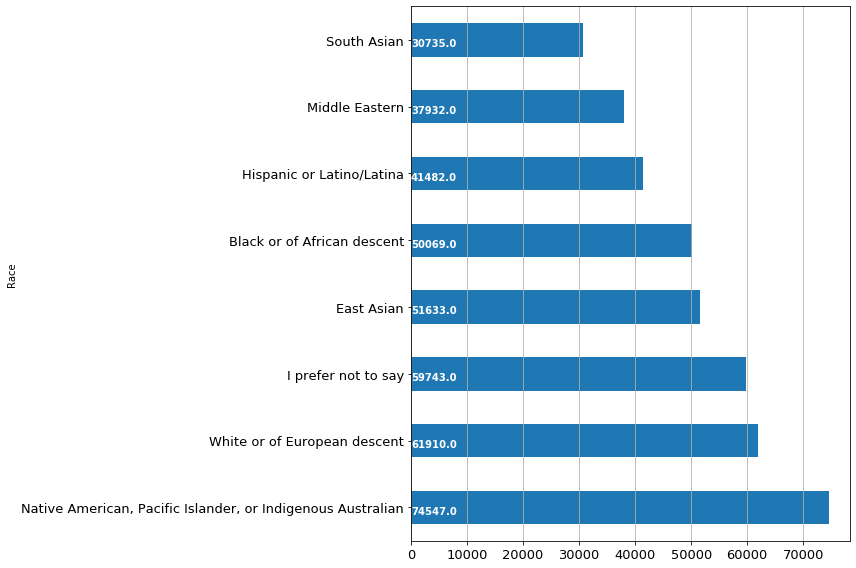

In [67]:
#Let's group our df into races and then find average salary for each race
race_salary_grp = df.groupby('Race')['Salary'].mean().sort_values(ascending= False).round()
race_salary_grp.plot(kind = 'barh', figsize = (12,8), fontsize = 13).grid(axis = 'x');
plt.tight_layout() 
#Display values in each bar
for index, value in enumerate(race_salary_grp):
    plt.text(value/y[index], index-.10, str(value), color = 'white', fontweight = 'bold')
#Save plot
plt.savefig('Race_Salary.jpg')

- Even though the Native American, Pacific Islander, or Indigenous Australian have the lowest number of respondents, they are the only group earning above $70,000 on average - if you're feeling lost like I am, you can also consider data like the Years of Experience, Developer Type, and some geographical factors to get more insight into why this is the case. 

- Another curious case is that of the South Asian respondents. Even though they are the second highest respondents in the survey, we see that they earn the least at just about $30, 000 annually. 
Does this tell us something about the general income level in South Asia or can we say that South Asians charge lower wages than everyone else in the global industry? 

- Whichever is the case, these findings are drawn from data collated from just a sample of the developer population in these Ethnic groups. The reality could be very different. 

## 2. Do student developers of different backgrounds also have widely different salary expectations from their peers?

Since we also have post-graduation Expected Salary for students that were learning how to code during the survey period, we can get a better perspective of how students of each ethnic group percieve the future worth of their skills. 

In [10]:
list(df2[df2['Column'] == 'ExpectedSalary']['Question'])

['You said before that you are currently learning how to program. When you have completed your studies, what annual salary do you expect to earn in your first job after graduation?']

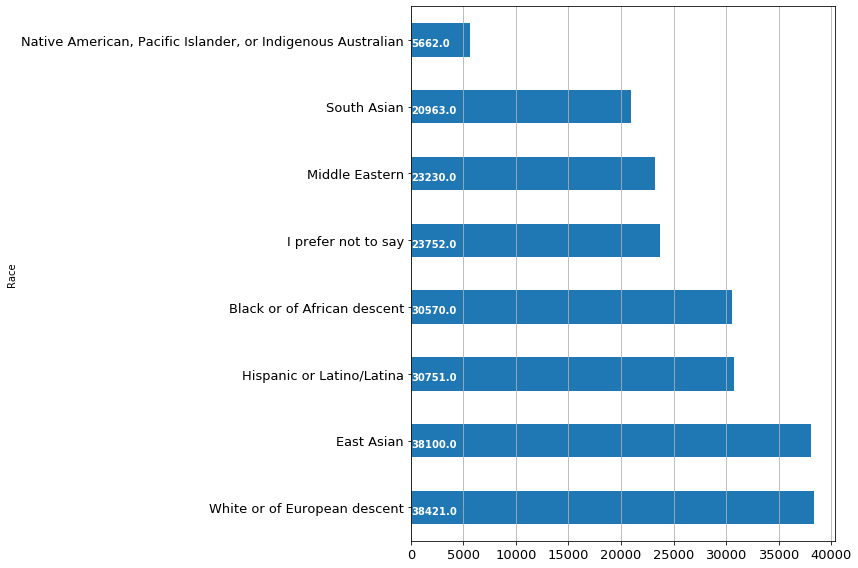

In [69]:
race_exp_salary_grp = df.groupby('Race')['ExpectedSalary'].mean().sort_values(ascending = False).round()
race_exp_salary_grp.plot(kind = 'barh', figsize = (12,8), fontsize = 13).grid(axis = 'x');
plt.tight_layout()
#Display values in each bar
for index, value in enumerate(race_exp_salary_grp):
    plt.text(value/y[index], index-.10, str(value), color = 'white', fontweight = 'bold')
#Save plot
plt.savefig('Race_Expected_Salary.jpg')

The student developers of White or of European descent and East Asian descents place a higher price on their skills relative to the rest of the population. These groups probably have a higher perception of their worth on the market, but it could be that they understand the going rate for developers in their locations. 

Surprisingly, the surveyed students with Native American, Pacific Islander, or Indigenous Australian descent projected the lowest annual income of all ethnic groups. Our earlier findings about Professional developers from the same ethnic group show that they earn the most compared to other ethnic group. _Could there be a disconnect between the two groups or the data provided by respondents is the problem?_

Coming second-bottom on the expected salary list are the South Asians. The result is not surprising as it gives credence to the possibility of a generally lower income for South Asian developers compared with their counterparts. 

### 4. Highest Education of Parents vs Earnings - Are you likely to earn more if your parents have at least a Bachelor's degree?

The common social perception is that people with parents with at least a Bachelor's degree tend to do better in life and have higher income levels compared to everyone else. 
Let's check if developers with parents with at least a bachelors degree tend to earn higher than their counterparts in the same ethnic group that are first generation students.

In [25]:
list(df2[df2['Column'] == 'HighestEducationParents']['Question'])

['What is the highest level of education received by either of your parents?']

In [12]:
df['HighestEducationParents'].unique() #Check the list of highest parents education available

array(['High school', "A master's degree", 'A professional degree',
       'A doctoral degree', nan, "A bachelor's degree",
       "Some college/university study, no bachelor's degree",
       'I prefer not to answer', 'Primary/elementary school',
       "I don't know/not sure", 'No education'], dtype=object)

In [13]:
#Encode the data into first-generation degree holders and those with degree-holder parents

def higher_ed(parents_ed_str):
    '''
    INPUT
        parents_ed_str - a string of one of the values from the Highest Education of parents column
    
    OUTPUT
        return 1 if the string is  in ("A bachelor's degree", "A professional degree", "A doctoral degree",
        "A master's degree")
        return 0 otherwise
    '''
    if parents_ed_str in ("A bachelor's degree", "A professional degree", "A doctoral degree", "A master's degree"):
        return 0
    else:
        return 1

#Test your function to assure it provides 1 and 0 values for a copy of our df
df_new = df.copy()
df_new["HighestEducationParents"].apply(higher_ed)[:5]

0    1
1    0
2    0
3    0
4    1
Name: HighestEducationParents, dtype: int64

In [14]:
#Apply function to encode the column
df_new['HighestEducationParents'] = df_new["HighestEducationParents"].apply(higher_ed)

In [15]:
#We can choose to remove null values from Salary 
#but what proportion of our respondents did not provide a salary?
prop_null = ((df_new['Salary'].isnull().sum()/df_new.shape[0])*100).round()
print( f'{prop_null} percent of respondents did not provide a salary')

75.0 percent of respondents did not provide a salary


In [17]:
#Drop any respondents without salary 
no_null_salary_df = df_new.dropna(subset = ['Salary']) 

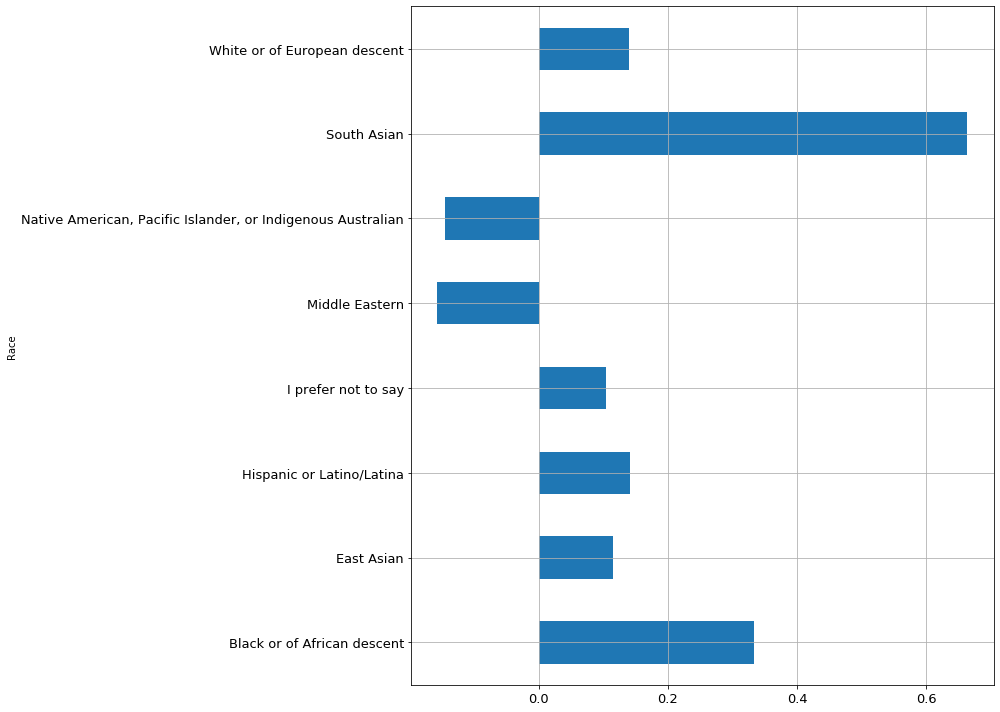

In [73]:
par_ed_1  = df_new[df_new['HighestEducationParents'] == 1] #Subset of dataframe that are first generation degree holders
par_ed_0 = df_new[df_new['HighestEducationParents'] == 0] #Subset of dataframe that are not first-generation degree holders

ed_1_mean = par_ed_1.groupby('Race')['Salary'].mean() #Average Salary of first_generation degree holders
ed_0_mean = par_ed_0.groupby('Race')['Salary'].mean() #Average Salary of non-first_generation degree holders

differ_ed_mean = ed_0_mean - ed_1_mean #Earning gap/Difference in salary of first-generation degree holders and non-first generation degree holders
perc_pay_gap = (differ_ed_mean/ed_1_mean) # Earning gap proportion
perc_pay_gap.plot(kind = 'barh', figsize = (14,10), fontsize = 13, grid = True);
plt.tight_layout()

plt.savefig('Race_Par_Salary_prop.jpg')
#plot title = 'Earning Gap if Parent\'s have a high degree and if they don\'t'


- The chart above supports the general perception stated above for most ethnic groups except those of Middle Eastern and Native American, Pacific Islander, or Indigenous Australian ancestry. 

- The earning gap is even more pronounced for `South Asians` - those developers whose parents have at least a Bachelor's degree can earn up to 65% more than those whose parents are not as educated. For developers with `Black or African descent`, the gap is about 33%. 

- Surprisingly enough though, `Middle Eastern` developers and those of `Native American, Pacific Islander, or Indigenous Australian descent` whose parents are not educated to a degree level earn more than ones whose parents have degrees - a gap of around 15%. 

Certainly, these results are inferences drawn from analysing this dataset which represents only a sample of the developer population in the world.